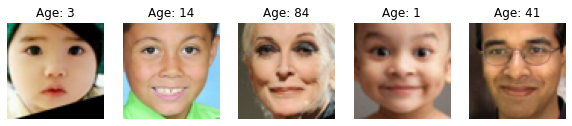

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Path to the root directory containing all the age folders
root_dir = 'C:/Users/viola/Downloads/archive/face_age/'

# Load images and labels
images = []
ages = []

# Iterate over each folder in the root directory
for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    
    # Check if the folder name is an integer (age)
    if os.path.isdir(folder_path) and folder_name.isdigit():
        age = int(folder_name)  # The folder name is the age label
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path).convert('RGB')  # Ensure image is RGB
                img = img.resize((64, 64))  # Resize all images to 64x64
                img = np.array(img) / 255.0  # Normalize the image
                images.append(img)
                ages.append(age)

images = np.array(images)
ages = np.array(ages)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size = 0.2, random_state = 42)

# Display a few images to ensure they are loaded correctly
plt.figure(figsize = (10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f'Age: {y_train[i]}')
    plt.axis('off')
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a more complex CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'linear')  # Age is a continuous value
])

# Compile the model
cnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

# Evaluate the model on the test set
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

# Extract features from the last layer of the CNN
X_train_cnn_features = cnn_model.predict(X_train)
X_test_cnn_features = cnn_model.predict(X_test)

Epoch 1/20
196/196 [==============================] - 34s 151ms/step - loss: 655.0524 - mae: 20.9780 - val_loss: 826.5753 - val_mae: 21.1173
Epoch 2/20
196/196 [==============================] - 31s 157ms/step - loss: 416.9807 - mae: 15.8492 - val_loss: 371.7254 - val_mae: 13.2159
Epoch 3/20
196/196 [==============================] - 31s 156ms/step - loss: 322.5334 - mae: 13.3860 - val_loss: 311.0711 - val_mae: 11.9364
Epoch 4/20
196/196 [==============================] - 30s 154ms/step - loss: 282.2262 - mae: 12.3390 - val_loss: 261.2773 - val_mae: 11.0890
Epoch 5/20
196/196 [==============================] - 31s 157ms/step - loss: 263.7836 - mae: 11.8681 - val_loss: 215.4587 - val_mae: 10.9305
Epoch 6/20
196/196 [==============================] - 32s 162ms/step - loss: 229.8851 - mae: 11.0285 - val_loss: 202.9036 - val_mae: 9.8974
Epoch 7/20
196/196 [==============================] - 30s 155ms/step - loss: 215.3386 - mae: 10.7054 - val_loss: 176.0939 - val_mae: 9.3058
Epoch 8/20
196/

Mean Absolute Error: 7.099976285242867


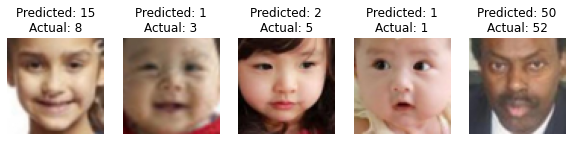

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cnn_features)
X_test_scaled = scaler.transform(X_test_cnn_features)

# Train the SVR model with different parameters
svr_model = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1)
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualize a few results
plt.figure(figsize = (10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'Predicted: {int(y_pred[i])}\nActual: {y_test[i]}')
    plt.axis('off')
plt.show()